
Descriptive Statistics for Individual Buildings:
                      count       mean        std       min         max  \
building_name                                                             
Castle 192               34   46926.47   24141.96       0.0    97100.00   
Cumberland D401 D404     34  124023.70   68679.99   11666.1   251062.71   
Med School               34  773805.76  211256.61  370932.0  1312107.00   

                            q25        q75  skewness  kurtosis  
building_name                                                   
Castle 192             28725.00   67975.00     -0.16     -0.77  
Cumberland D401 D404   57668.22  176484.32     -0.20     -1.04  
Med School            628774.50  916735.00      0.09      0.22  


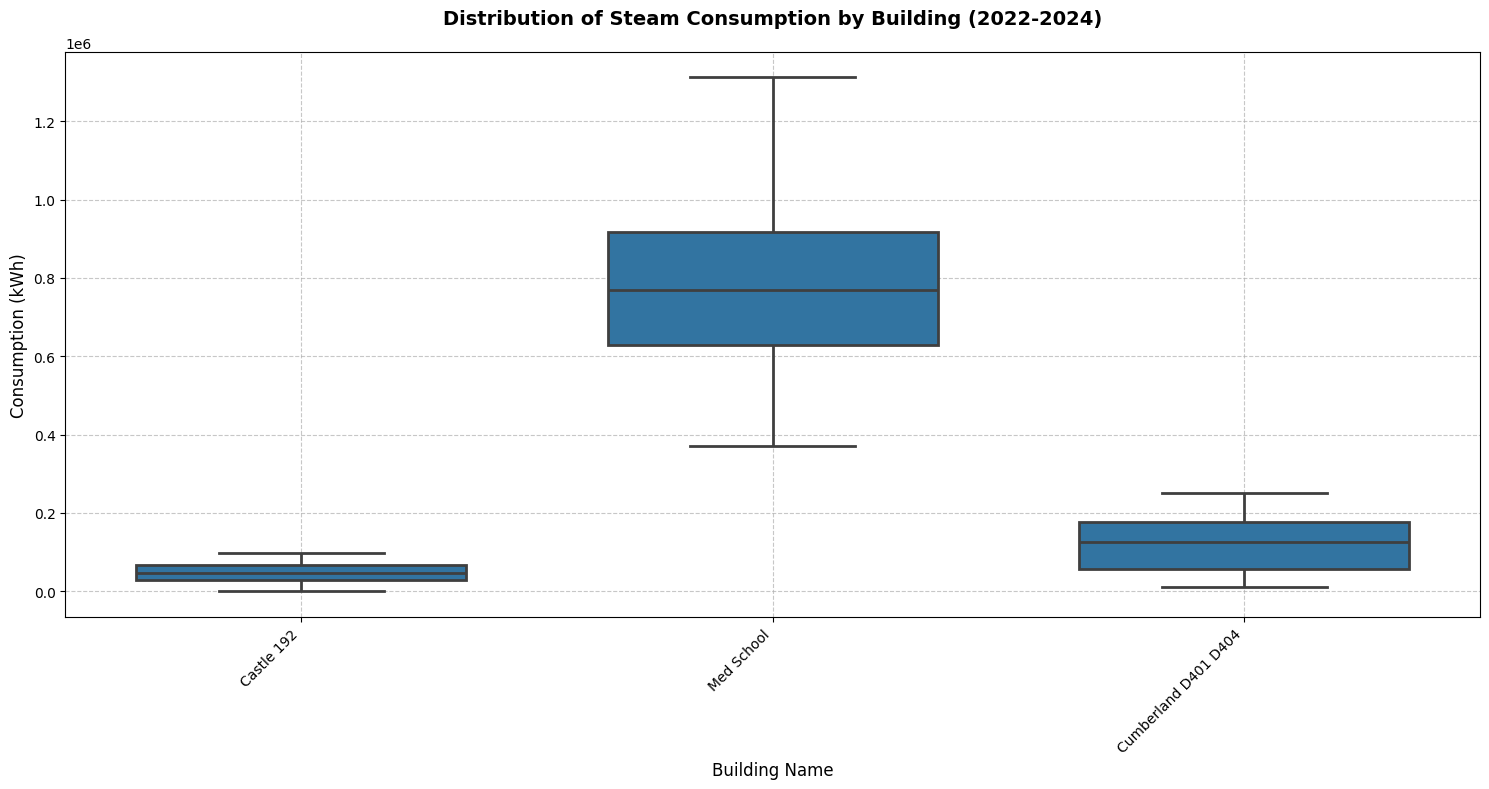

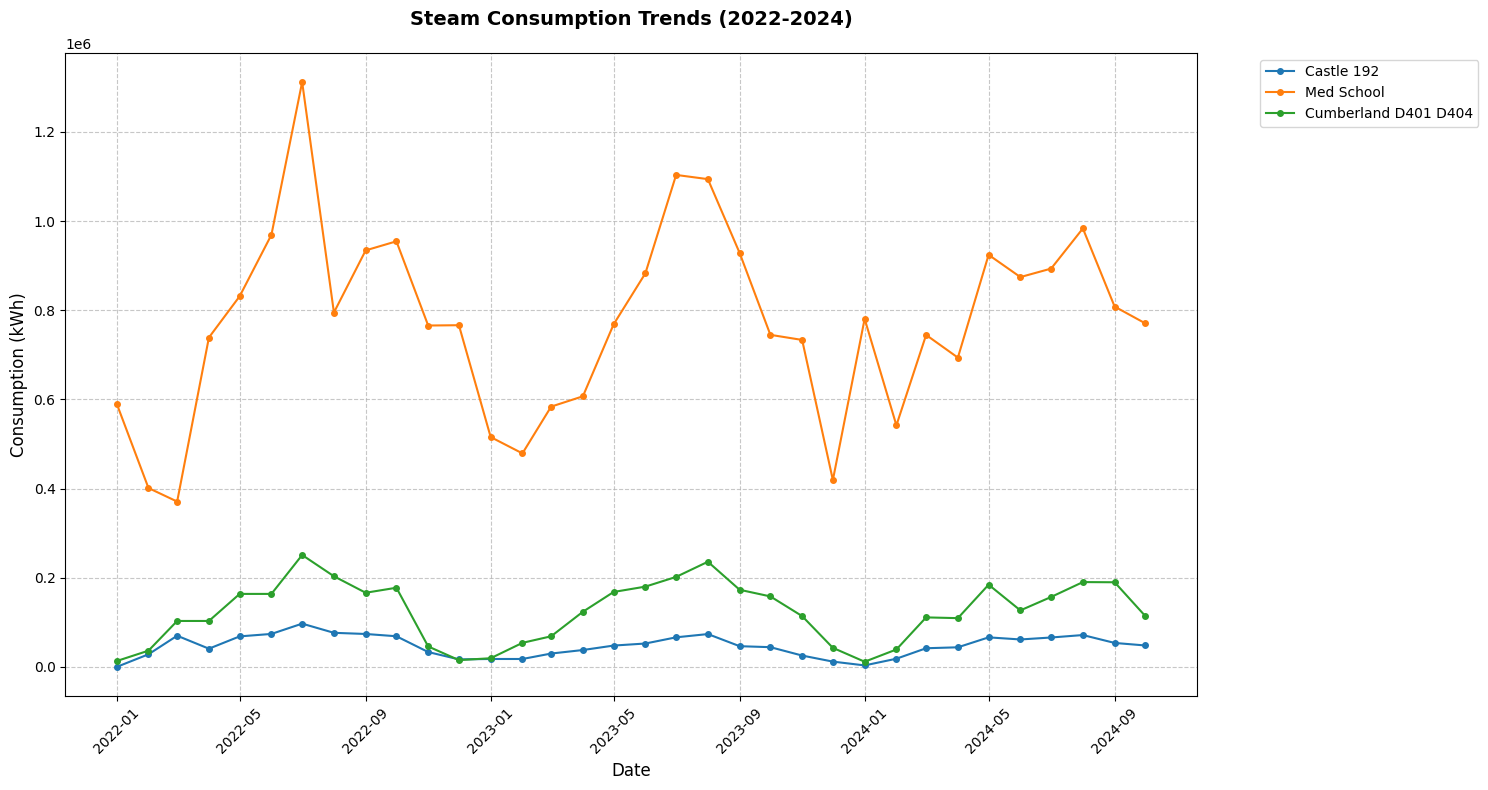

In [2]:
# Import required libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Steam data
BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Steam_data.csv"
steam_data = pd.read_csv(FILE_PATH)

# Create datetime column for better time series analysis
steam_data['date'] = pd.to_datetime(steam_data['month'] + ' ' + steam_data['year'].astype(str), format='%b %Y')

# Melt the dataframe to convert building consumption columns to rows for analysis
building_columns = ['castle_192_consumption_kwh', 
                   'med_school_consumption_kwh', 
                   'cumberland_d401_d404_consumption_kwh']

melted_buildings = pd.melt(steam_data,
                          id_vars=['date', 'month', 'year'],
                          value_vars=building_columns,
                          var_name='building_name',
                          value_name='consumption_kwh')

# Clean building names for better readability
melted_buildings['building_name'] = melted_buildings['building_name'].apply(
    lambda x: x.replace('_consumption_kwh', '').replace('_', ' ').title())

# Calculate descriptive statistics for building meters
building_stats = melted_buildings.groupby('building_name')['consumption_kwh'].agg([
    'count',
    'mean',
    'std',
    'min',
    'max',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: x.skew(),
    lambda x: x.kurtosis()
]).round(2)

building_stats.columns = ['count', 'mean', 'std', 'min', 'max', 'q25', 'q75', 'skewness', 'kurtosis']

print("\nDescriptive Statistics for Individual Buildings:")
print(building_stats)

# Create boxplot visualization
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_buildings, x='building_name', y='consumption_kwh',
            width=0.7,
            linewidth=2,
            fliersize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Steam Consumption by Building (2022-2024)', 
         pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Building Name', fontsize=12)
plt.ylabel('Consumption (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Additional time series plot
plt.figure(figsize=(15, 8))
for building in melted_buildings['building_name'].unique():
    building_data = melted_buildings[melted_buildings['building_name'] == building]
    plt.plot(building_data['date'], building_data['consumption_kwh'], 
             label=building, marker='o', markersize=4)

plt.title('Steam Consumption Trends (2022-2024)', 
         pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consumption (kWh)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 2000x1200 with 0 Axes>

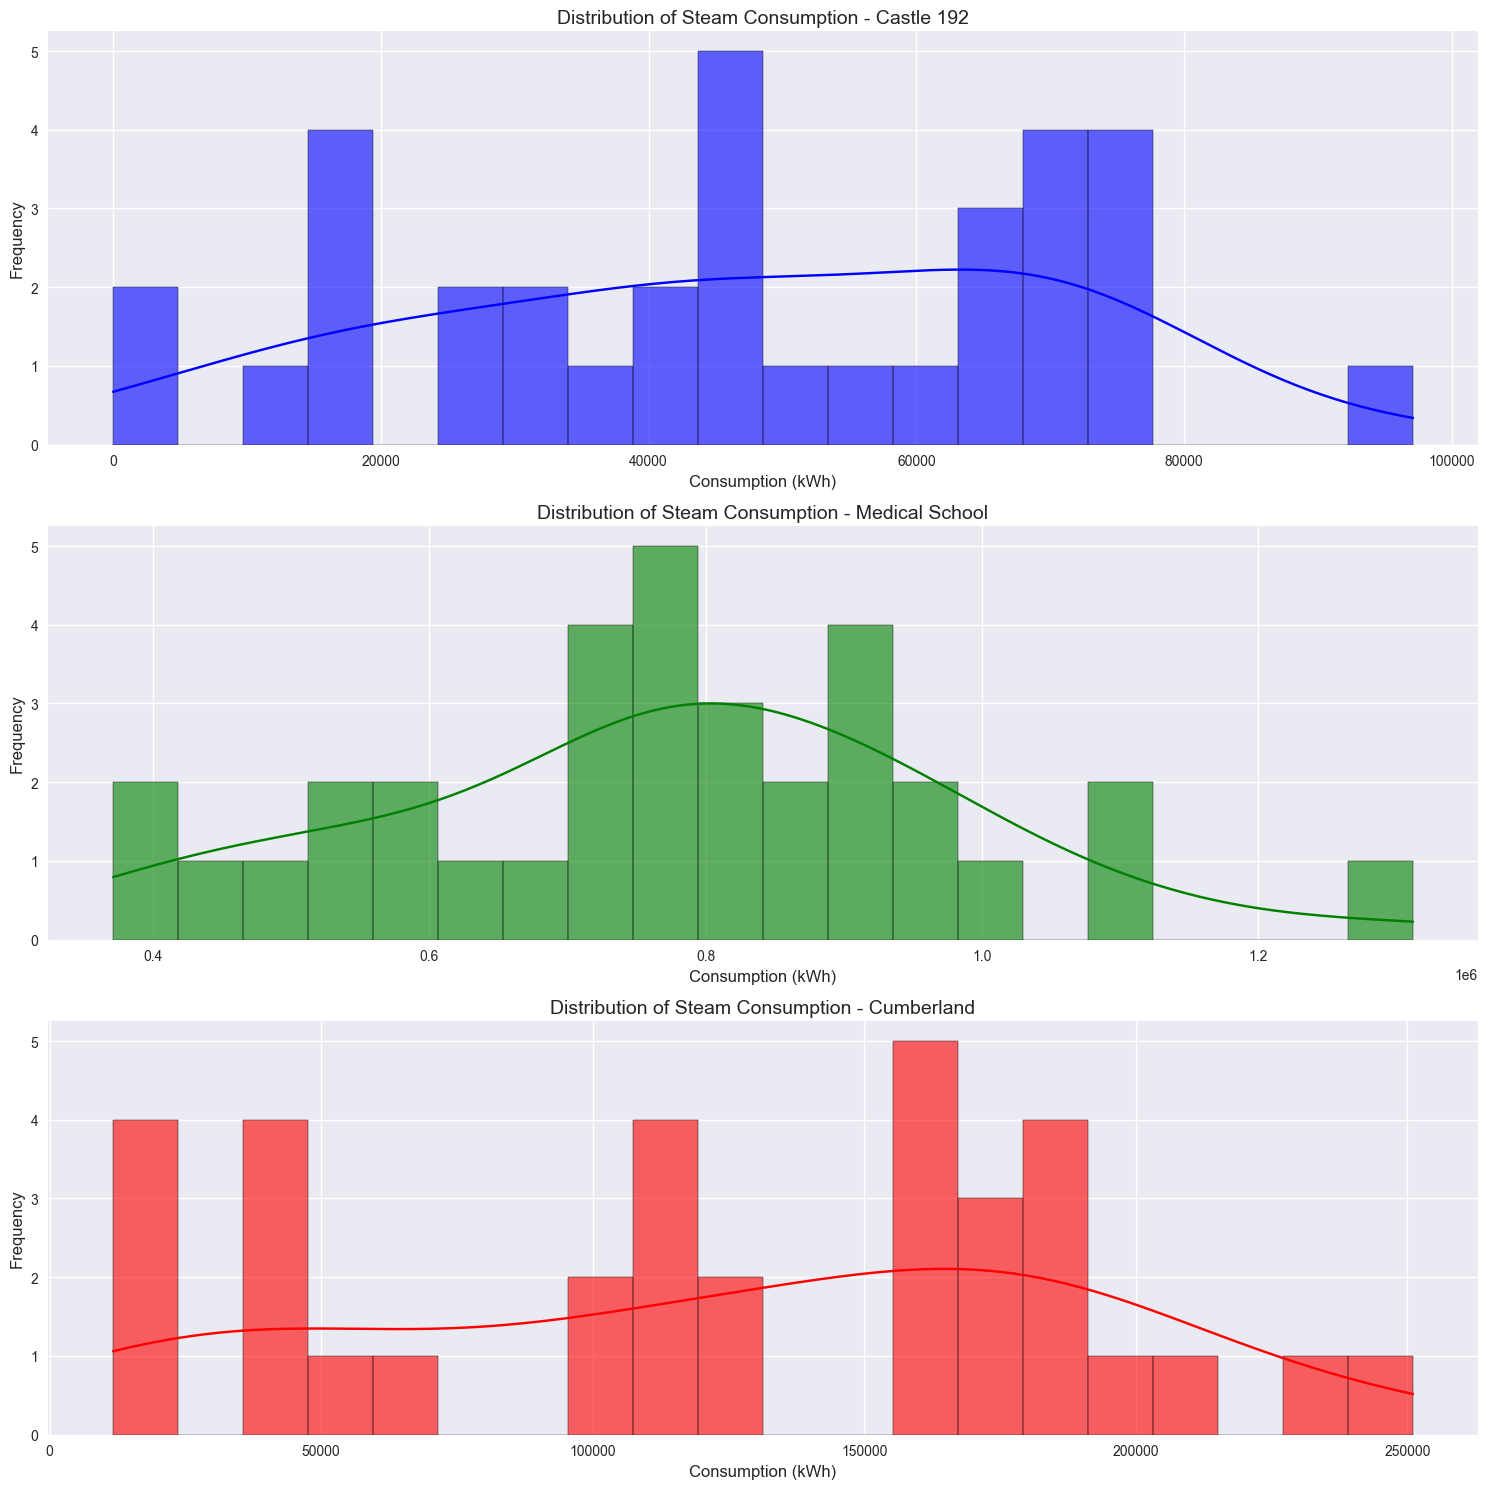

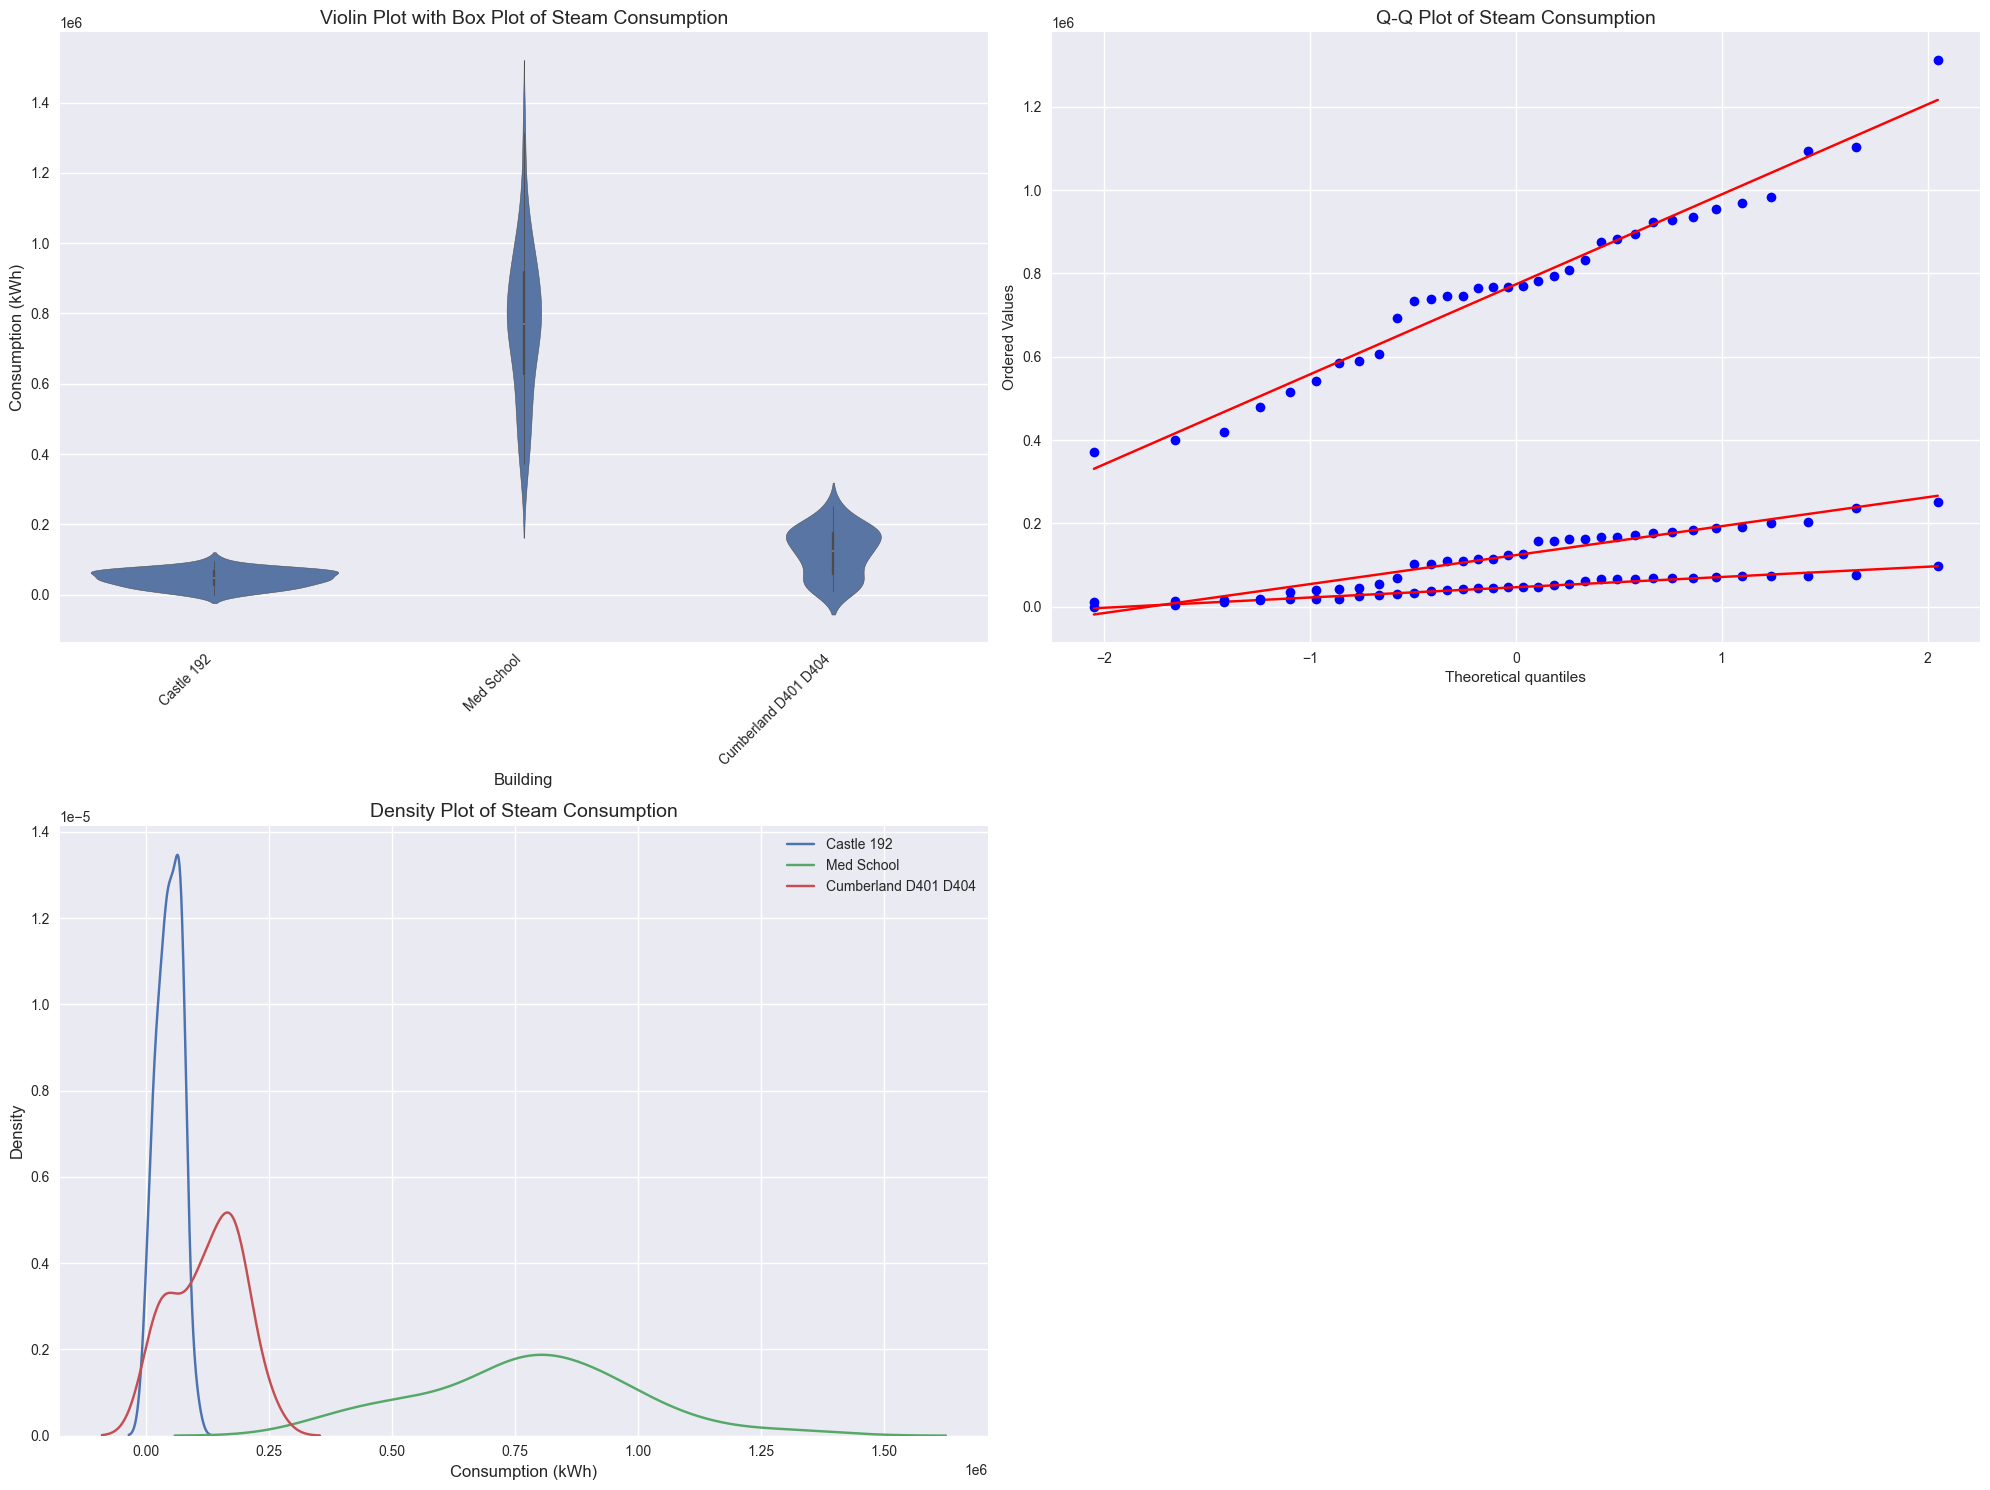


Distribution Statistics by Building:
                           mean     median        std  skewness  kurtosis
building                                                                 
Castle 192             46926.47   47200.00   24141.96     -0.16     -0.83
Cumberland D401 D404  124023.70  125282.63   68679.99     -0.20     -1.07
Med School            773805.76  769574.50  211256.61      0.09      0.02

Normality Test Results (Shapiro-Wilk):

Castle 192:
Statistic: 0.9640
p-value: 0.3175

Med School:
Statistic: 0.9754
p-value: 0.6240

Cumberland D401 D404:
Statistic: 0.9418
p-value: 0.0696


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create subplot figure
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 12))

steam_data = pd.read_csv(FILE_PATH)

# Define building columns
building_columns = ['castle_192_consumption_kwh', 
                   'med_school_consumption_kwh', 
                   'cumberland_d401_d404_consumption_kwh']

# Melt the dataframe
melted_buildings = pd.melt(steam_data,
                          id_vars=['month', 'year'],
                          value_vars=building_columns,
                          var_name='building',
                          value_name='consumption')

# Clean building names
melted_buildings['building'] = melted_buildings['building'].apply(
    lambda x: x.replace('_consumption_kwh', '').replace('_', ' ').title())

# Set the style
plt.style.use('seaborn-v0_8')

# Create separate histograms with KDE
plt.figure(figsize=(15, 15))

# Castle 192
plt.subplot(3, 1, 1)
sns.histplot(data=melted_buildings[melted_buildings['building'] == 'Castle 192'],
            x='consumption', kde=True, color='blue', alpha=0.6, bins=20)
plt.title('Distribution of Steam Consumption - Castle 192', fontsize=14)
plt.xlabel('Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Medical School
plt.subplot(3, 1, 2)
sns.histplot(data=melted_buildings[melted_buildings['building'] == 'Med School'],
            x='consumption', kde=True, color='green', alpha=0.6, bins=20)
plt.title('Distribution of Steam Consumption - Medical School', fontsize=14)
plt.xlabel('Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Cumberland
plt.subplot(3, 1, 3)
sns.histplot(data=melted_buildings[melted_buildings['building'] == 'Cumberland D401 D404'],
            x='consumption', kde=True, color='red', alpha=0.6, bins=20)
plt.title('Distribution of Steam Consumption - Cumberland', fontsize=14)
plt.xlabel('Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Create new figure for remaining plots
plt.figure(figsize=(20, 15))

# Violin Plot
plt.subplot(2, 2, 1)
sns.violinplot(data=melted_buildings, x='building', y='consumption', inner='box')
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot with Box Plot of Steam Consumption', fontsize=14)
plt.xlabel('Building', fontsize=12)
plt.ylabel('Consumption (kWh)', fontsize=12)

# Q-Q Plot
plt.subplot(2, 2, 2)
for building in melted_buildings['building'].unique():
    building_data = melted_buildings[melted_buildings['building'] == building]['consumption']
    stats.probplot(building_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Steam Consumption', fontsize=14)

# Density Plot
plt.subplot(2, 2, 3)
for building in melted_buildings['building'].unique():
    sns.kdeplot(data=melted_buildings[melted_buildings['building'] == building],
                x='consumption', label=building)
plt.title('Density Plot of Steam Consumption', fontsize=14)
plt.xlabel('Consumption (kWh)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate distribution statistics
distribution_stats = melted_buildings.groupby('building')['consumption'].agg([
    'mean',
    'median',
    'std',
    'skew',
    lambda x: stats.kurtosis(x)  # Using scipy.stats for kurtosis
]).round(2)

# Rename the lambda function column
distribution_stats.columns = ['mean', 'median', 'std', 'skewness', 'kurtosis']

print("\nDistribution Statistics by Building:")
print(distribution_stats)

# Perform Shapiro-Wilk test for normality
print("\nNormality Test Results (Shapiro-Wilk):")
for building in melted_buildings['building'].unique():
    stat, p_value = stats.shapiro(melted_buildings[melted_buildings['building'] == building]['consumption'])
    print(f"\n{building}:")
    print(f"Statistic: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")

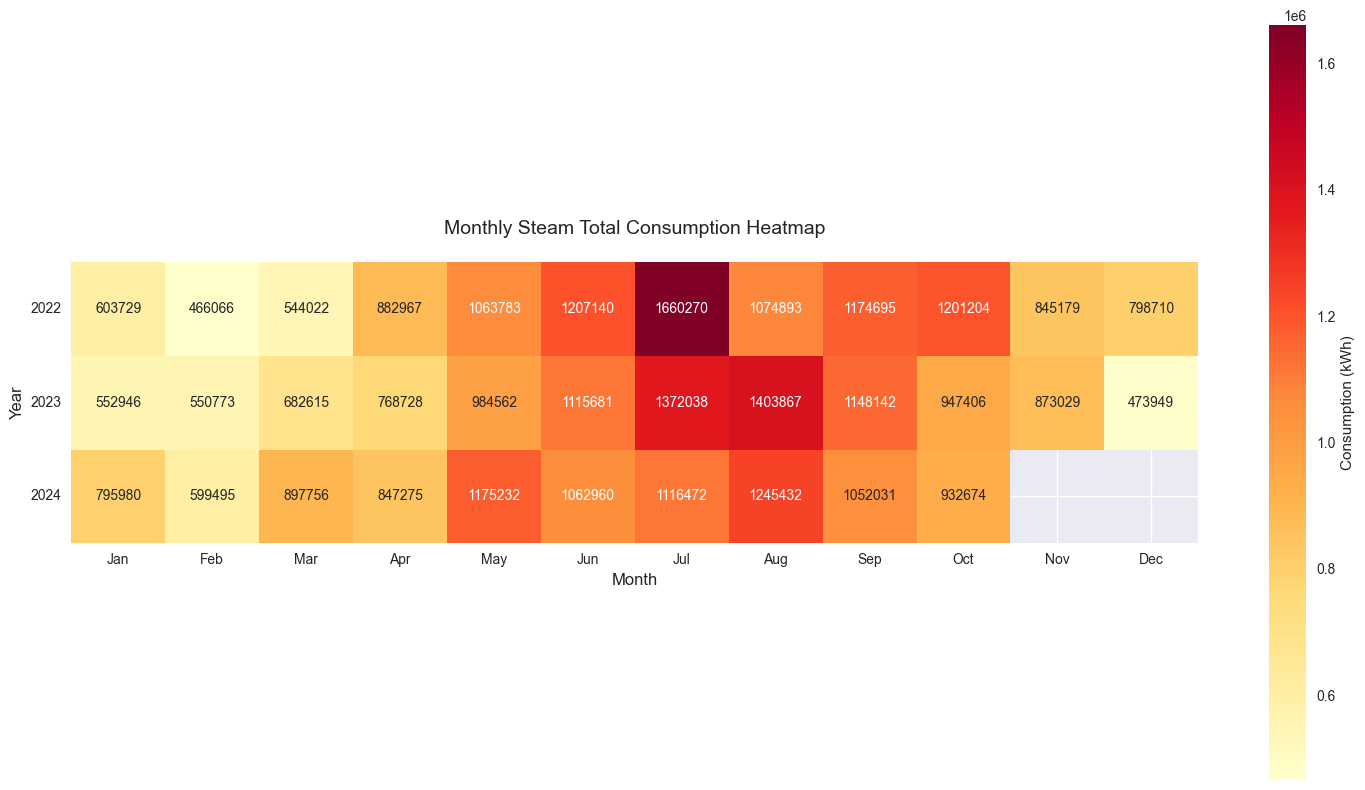

In [14]:
# Calculate total consumption across all buildings
steam_data['total_consumption'] = (steam_data['castle_192_consumption_kwh'] + 
                                 steam_data['med_school_consumption_kwh'] + 
                                 steam_data['cumberland_d401_d404_consumption_kwh'])

# Create pivot table for heatmap
heatmap_data = steam_data.pivot(index='year', 
                               columns='month', 
                               values='total_consumption')

# Reorder months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data[month_order]

# Create figure and axis
plt.figure(figsize=(15, 8))

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True,  # Show values in cells
            fmt='.0f',   # Format numbers as integers
            cmap='YlOrRd',  # Yellow to Red color scheme
            cbar_kws={'label': 'Consumption (kWh)'},
            square=True)

plt.title('Monthly Steam Total Consumption Heatmap', pad=20, fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Analyzing castle_192_consumption_kwh


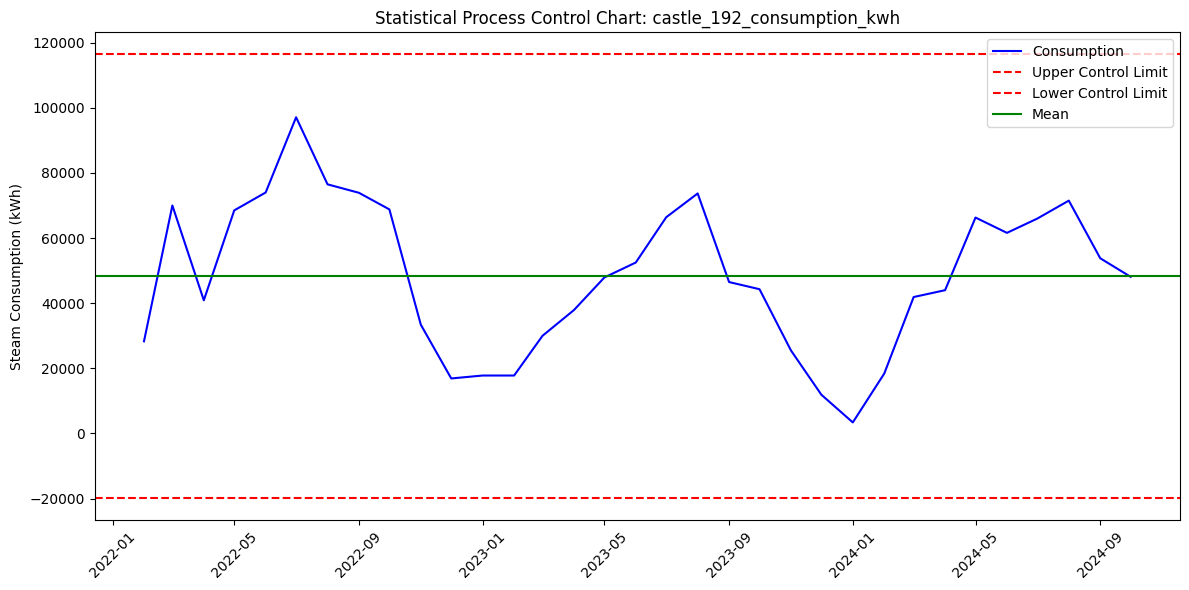

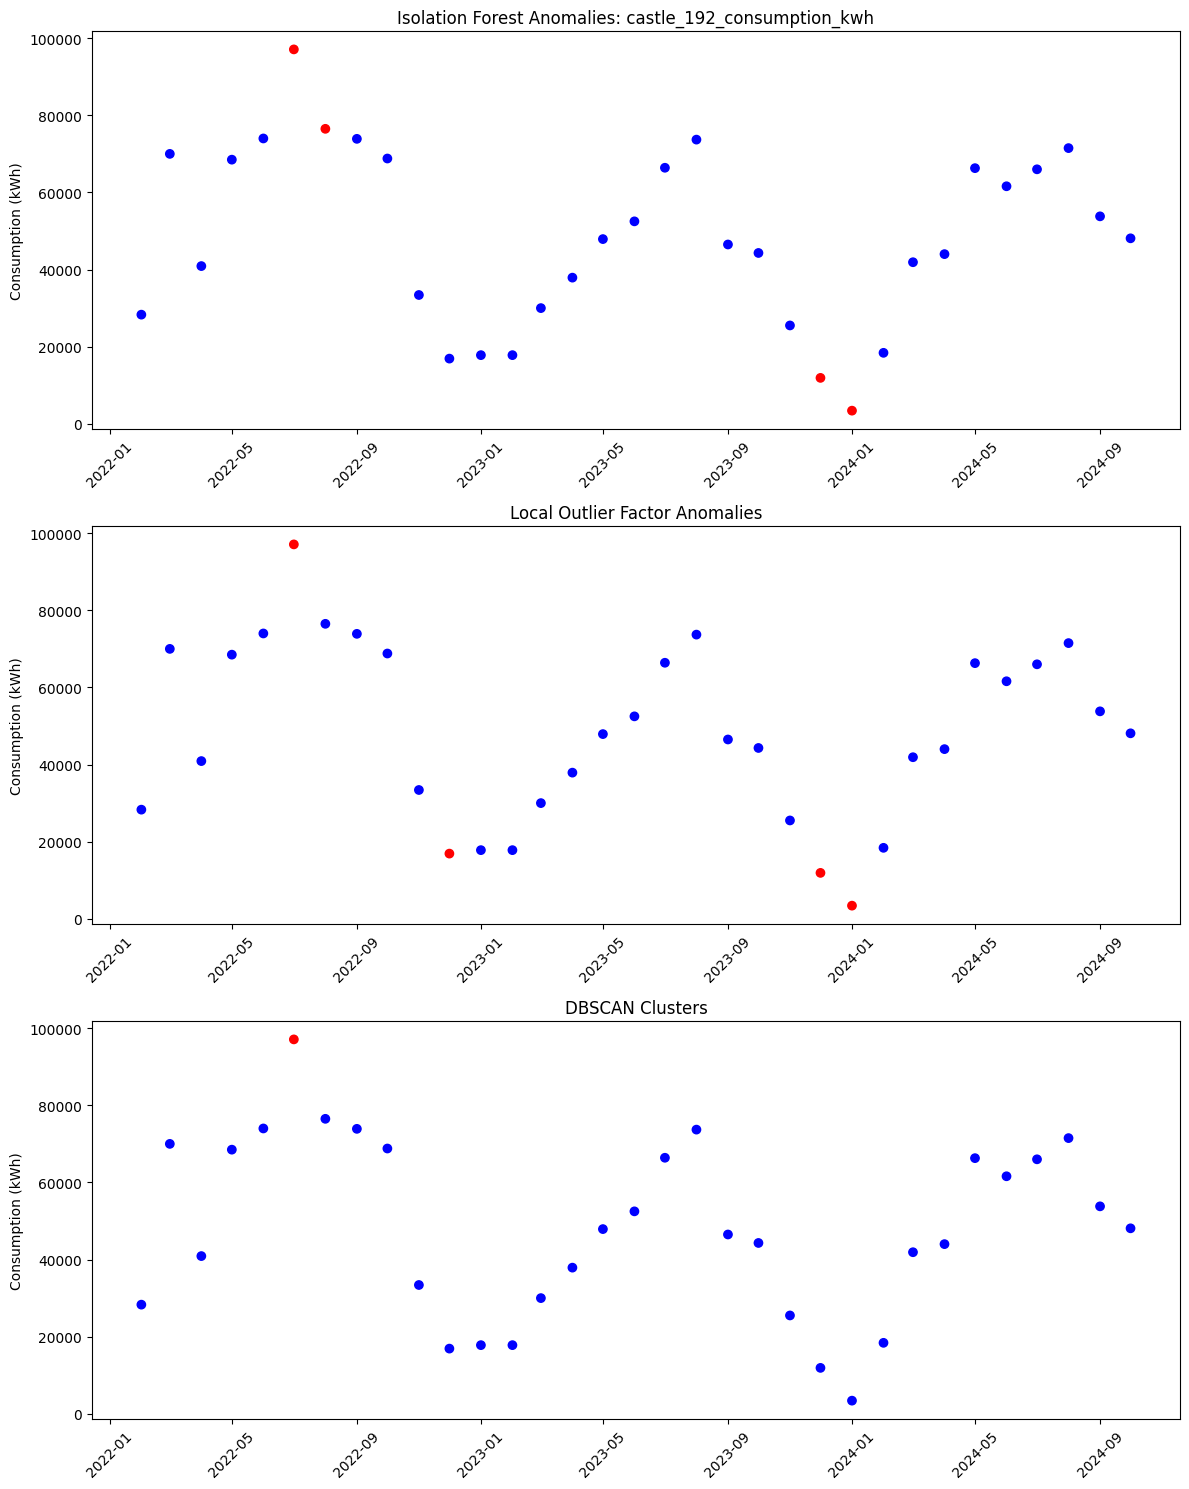


Anomaly Detection Summary for castle_192_consumption_kwh:
Total observations: 33
Isolation Forest anomalies: 4 (12.1%)
LOF anomalies: 4 (12.1%)
DBSCAN outliers: 1 (3.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 97100.00 kWh
Date: 2022-08, Consumption: 76500.00 kWh
Date: 2023-12, Consumption: 11900.00 kWh
Date: 2024-01, Consumption: 3400.00 kWh

Analyzing med_school_consumption_kwh


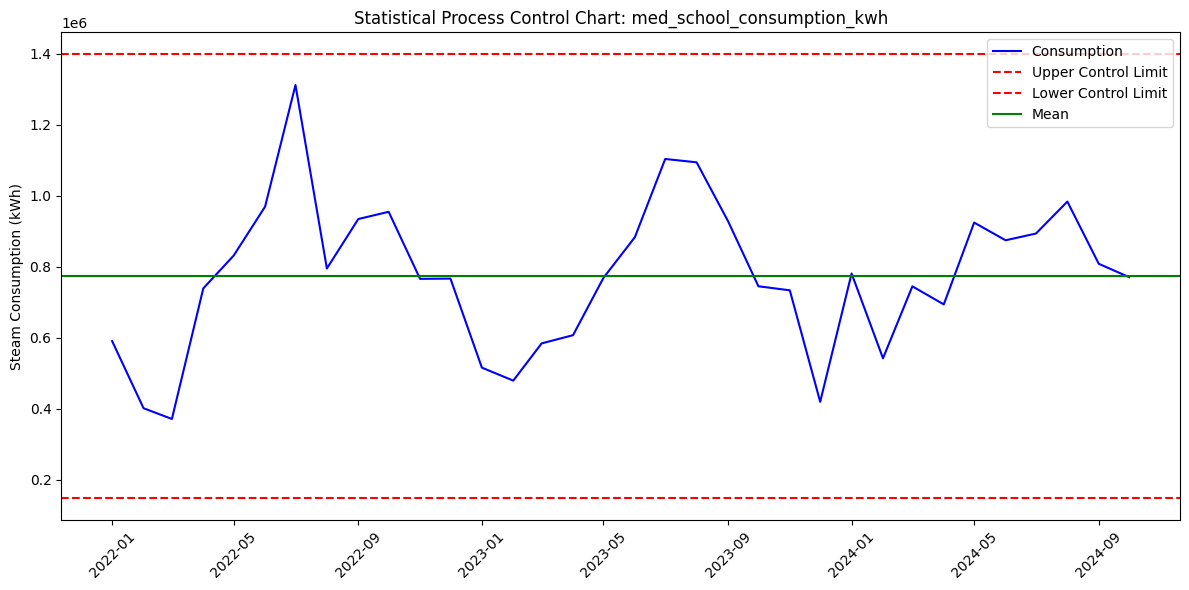

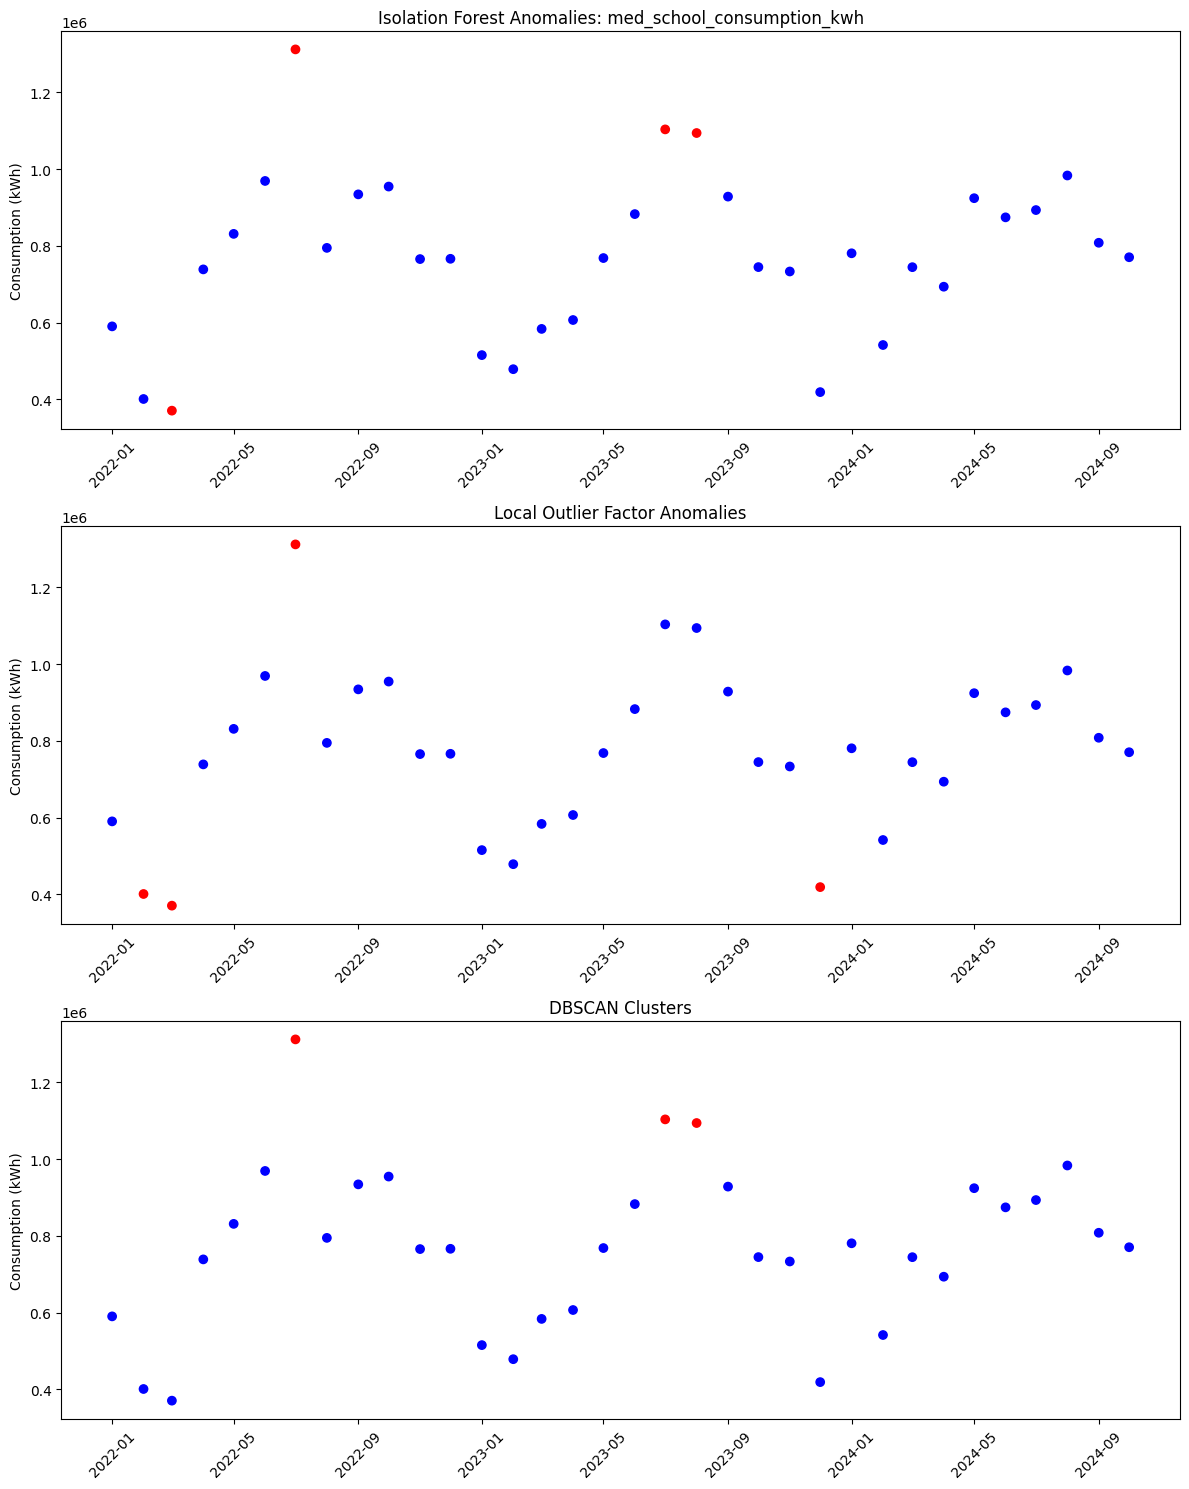


Anomaly Detection Summary for med_school_consumption_kwh:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 3 (8.8%)

Detailed Anomalies (Isolation Forest):
Date: 2022-03, Consumption: 370932.00 kWh
Date: 2022-07, Consumption: 1312107.00 kWh
Date: 2023-07, Consumption: 1103702.00 kWh
Date: 2023-08, Consumption: 1094251.00 kWh

Analyzing cumberland_d401_d404_consumption_kwh


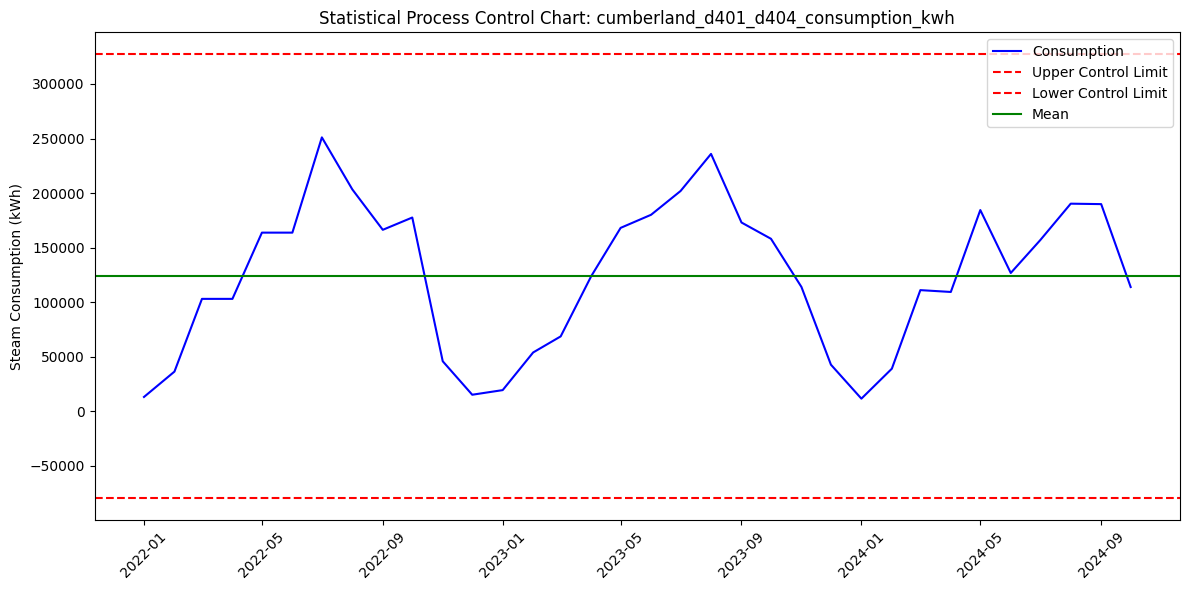

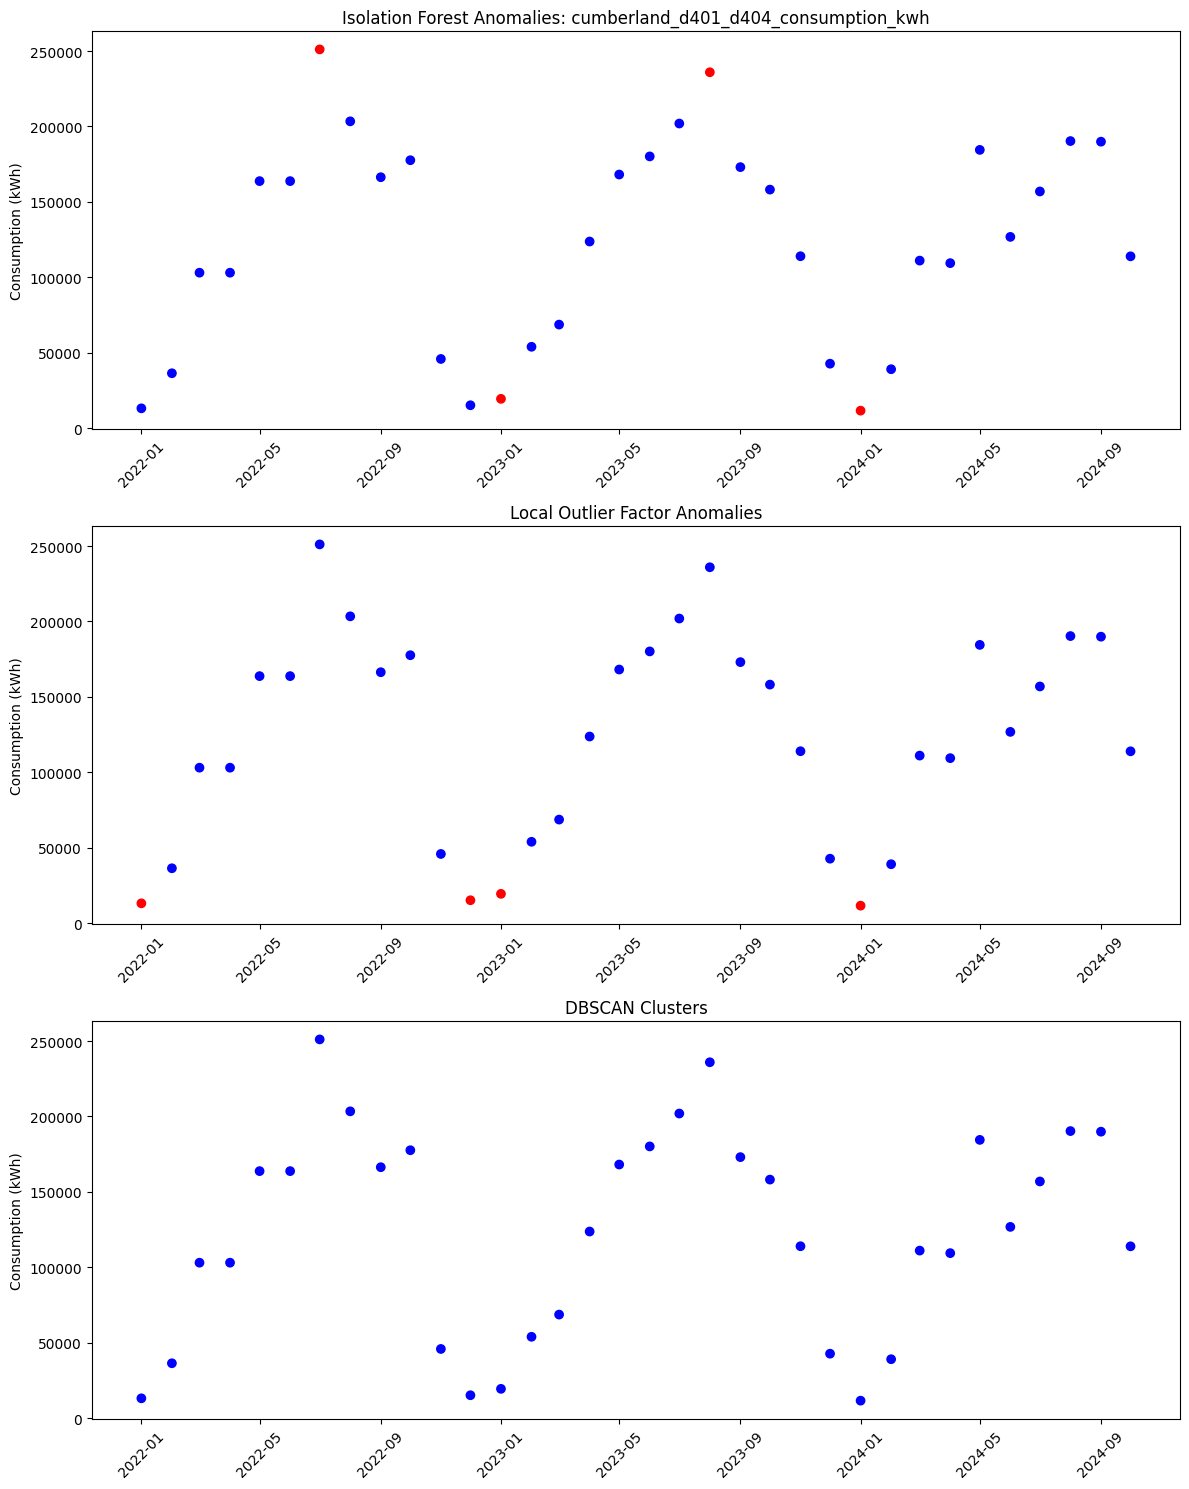


Anomaly Detection Summary for cumberland_d401_d404_consumption_kwh:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Detailed Anomalies (Isolation Forest):
Date: 2022-07, Consumption: 251062.71 kWh
Date: 2023-01, Consumption: 19491.53 kWh
Date: 2023-08, Consumption: 235916.10 kWh
Date: 2024-01, Consumption: 11666.10 kWh

Analyzing total_consumption


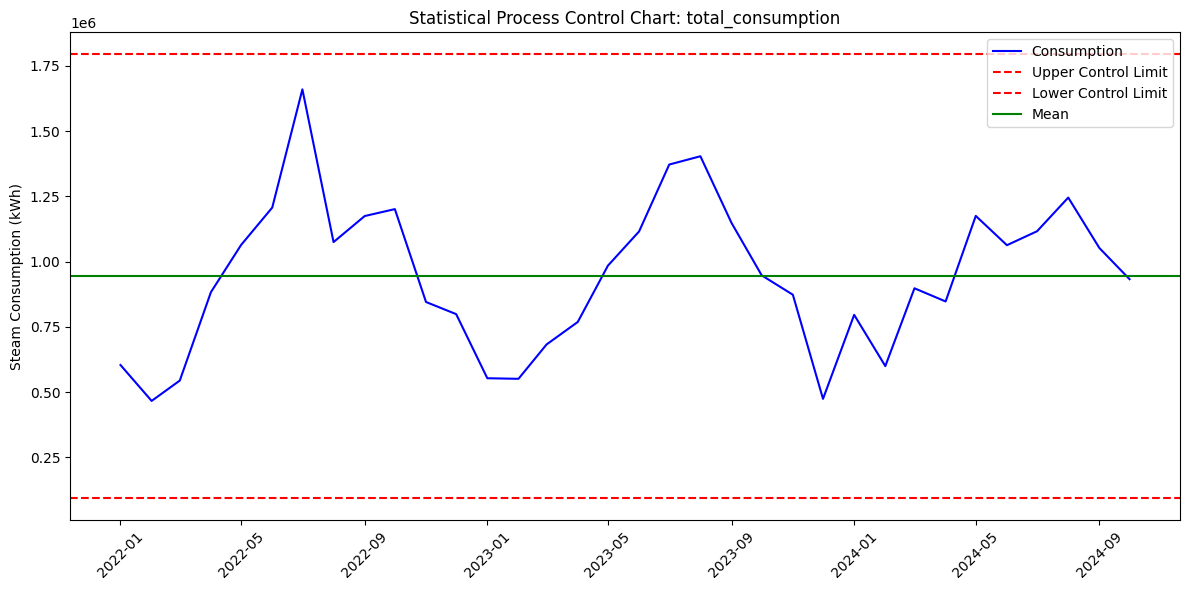

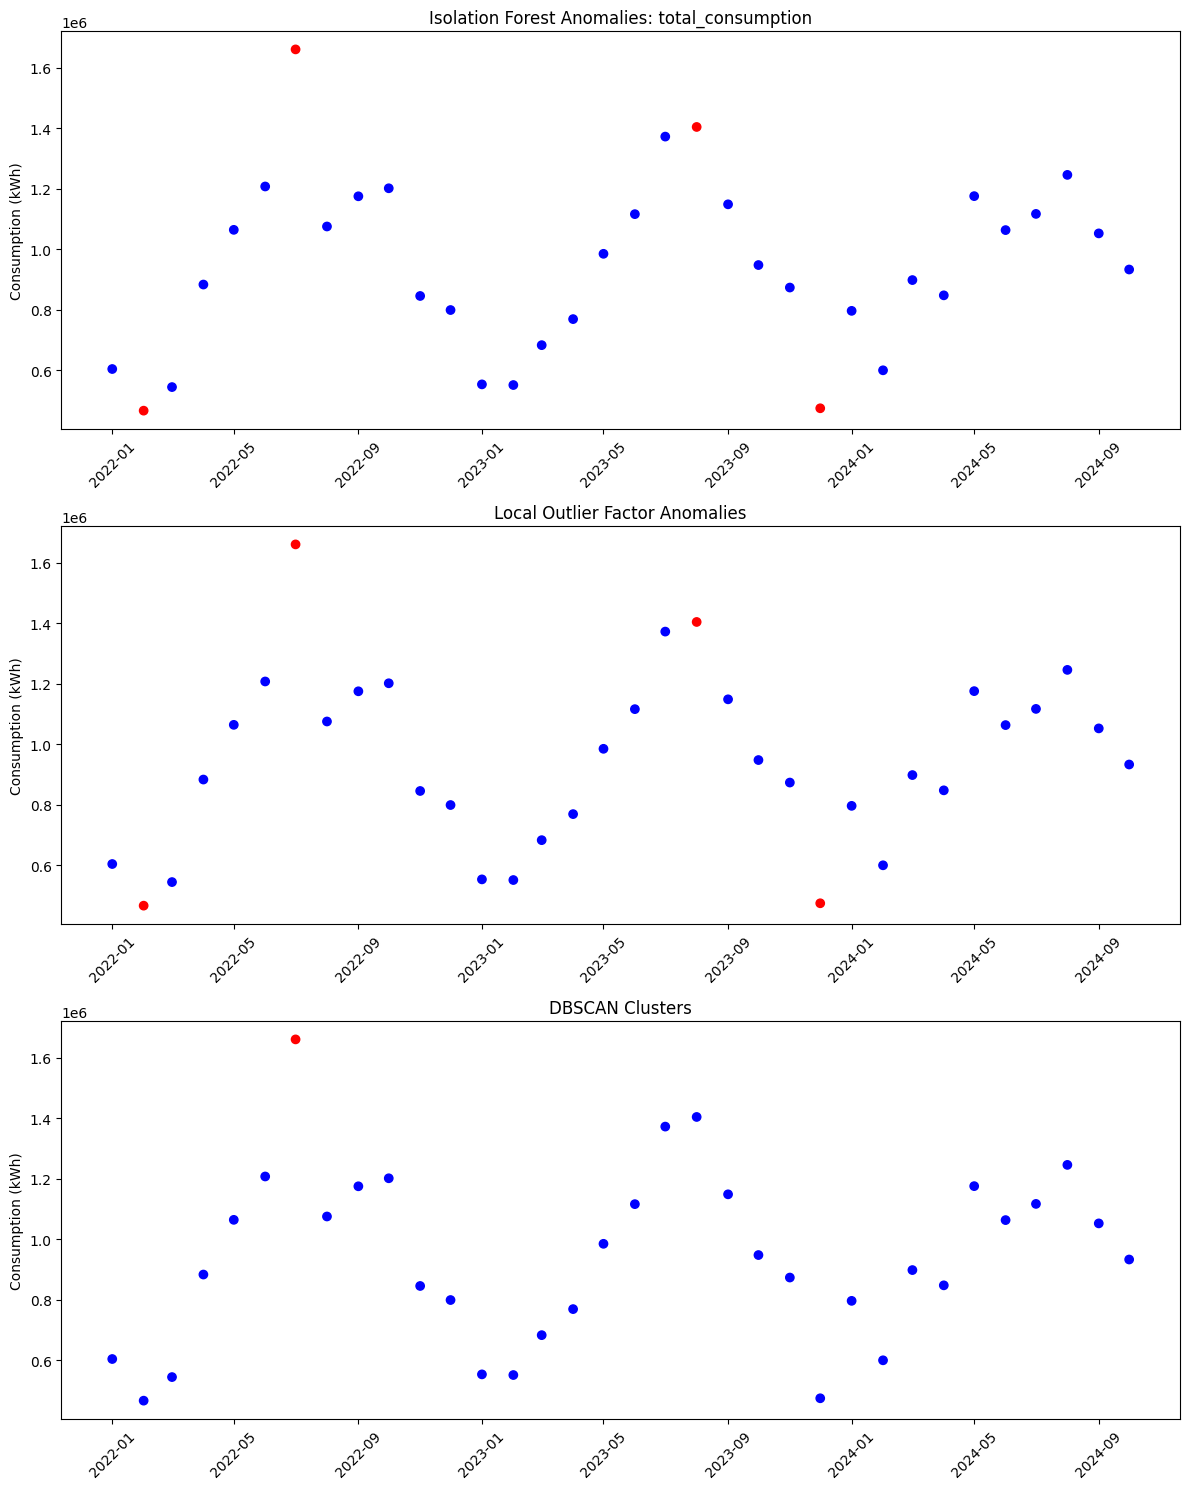


Anomaly Detection Summary for total_consumption:
Total observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 1 (2.9%)

Detailed Anomalies (Isolation Forest):
Date: 2022-02, Consumption: 466066.31 kWh
Date: 2022-07, Consumption: 1660269.71 kWh
Date: 2023-08, Consumption: 1403867.10 kWh
Date: 2023-12, Consumption: 473948.98 kWh


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

def perform_steam_anomaly_detection(data, building_column):
    """Perform anomaly detection for steam consumption"""
    
    # Get building data and convert to time series
    building_data = data[building_column].values.reshape(-1, 1)
    dates = pd.to_datetime(data['year'].astype(str) + '-' + data['month'], format='%Y-%b')
    
    # Filter out zero values
    non_zero_mask = building_data.flatten() > 0
    building_data = building_data[non_zero_mask]
    dates = dates[non_zero_mask]
    
    # 1. Statistical Process Control (3-sigma)
    mean = np.mean(building_data)
    std = np.std(building_data)
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, building_data, 'b-', label='Consumption')
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Control Limit')
    plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Control Limit')
    plt.axhline(y=mean, color='g', linestyle='-', label='Mean')
    plt.title(f'Statistical Process Control Chart: {building_column}')
    plt.xticks(rotation=45)
    plt.ylabel('Steam Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 2. Multiple Anomaly Detection Methods
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(building_data)
    
    # Apply detection methods
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest_labels = iso_forest.fit_predict(scaled_data)
    
    lof = LocalOutlierFactor(contamination=0.1)
    lof_labels = lof.fit_predict(scaled_data)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    
    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

    # Isolation Forest
    colors = ['blue' if label == 1 else 'red' for label in iso_forest_labels]
    ax1.scatter(dates, building_data, c=colors)
    ax1.set_title(f'Isolation Forest Anomalies: {building_column}')
    ax1.set_ylabel('Consumption (kWh)')
    ax1.tick_params(axis='x', rotation=45)

    # LOF
    colors = ['blue' if label == 1 else 'red' for label in lof_labels]
    ax2.scatter(dates, building_data, c=colors)
    ax2.set_title('Local Outlier Factor Anomalies')
    ax2.set_ylabel('Consumption (kWh)')
    ax2.tick_params(axis='x', rotation=45)

    # DBSCAN
    colors = ['blue' if label != -1 else 'red' for label in dbscan_labels]
    ax3.scatter(dates, building_data, c=colors)
    ax3.set_title('DBSCAN Clusters')
    ax3.set_ylabel('Consumption (kWh)')
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nAnomaly Detection Summary for {building_column}:")
    print(f"Total observations: {len(building_data)}")
    print(f"Isolation Forest anomalies: {sum(iso_forest_labels == -1)} ({sum(iso_forest_labels == -1)/len(iso_forest_labels)*100:.1f}%)")
    print(f"LOF anomalies: {sum(lof_labels == -1)} ({sum(lof_labels == -1)/len(lof_labels)*100:.1f}%)")
    print(f"DBSCAN outliers: {sum(dbscan_labels == -1)} ({sum(dbscan_labels == -1)/len(dbscan_labels)*100:.1f}%)")
    
    # Identify specific anomalous periods
    anomaly_dates = dates[iso_forest_labels == -1]
    anomaly_values = building_data[iso_forest_labels == -1]
    if len(anomaly_dates) > 0:
        print("\nDetailed Anomalies (Isolation Forest):")
        for date, value in zip(anomaly_dates, anomaly_values):
            print(f"Date: {date.strftime('%Y-%m')}, Consumption: {value[0]:.2f} kWh")
    
    return {
        'iso_forest': iso_forest_labels,
        'lof': lof_labels,
        'dbscan': dbscan_labels
    }

steam_data = pd.read_csv(FILE_PATH)

# Calculate mean January value for Castle 192 from 2023 and 2024
jan_2023_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2023), 'castle_192_consumption_kwh'].values[0]
jan_2024_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2024), 'castle_192_consumption_kwh'].values[0]
jan_mean = (jan_2023_value + jan_2024_value) / 2  # (17800 + 3400) / 2 = 10600


steam_data['total_consumption'] = (steam_data['castle_192_consumption_kwh'] + 
                                 steam_data['med_school_consumption_kwh'] + 
                                 steam_data['cumberland_d401_d404_consumption_kwh'])

# Execute for all buildings
building_columns = ['castle_192_consumption_kwh', 
                   'med_school_consumption_kwh', 
                   'cumberland_d401_d404_consumption_kwh',
                   'total_consumption']

for building in building_columns:
    print("\n" + "="*50)
    print(f"Analyzing {building}")
    print("="*50)
    perform_steam_anomaly_detection(steam_data, building)


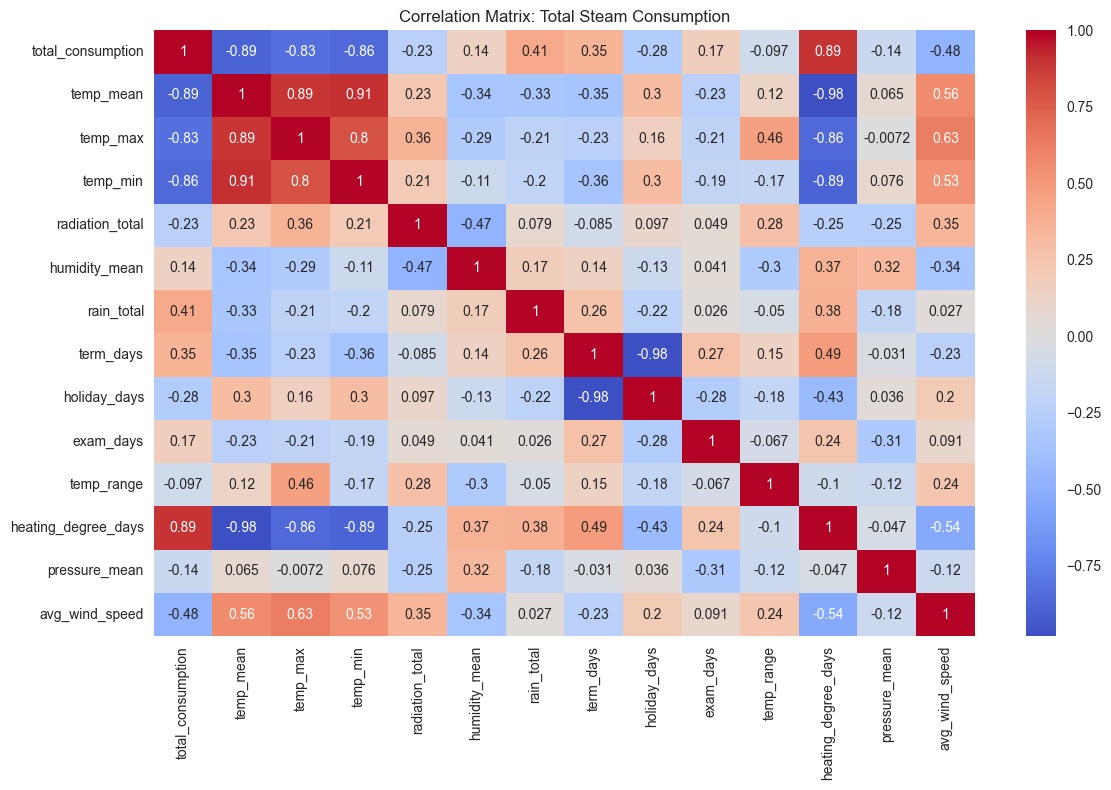

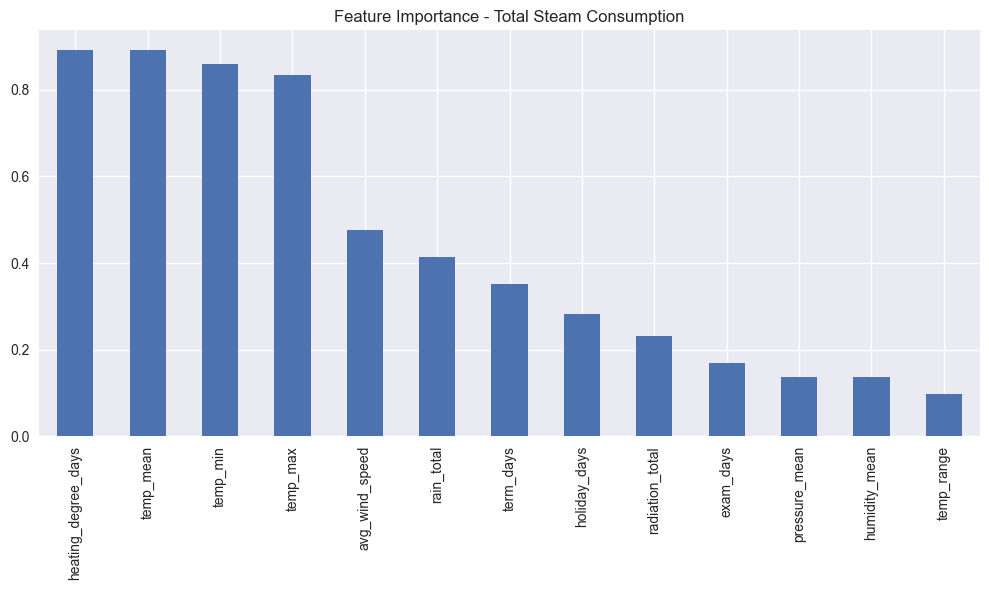

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Steam_data.csv"
steam_data = pd.read_csv(FILE_PATH)

WEATHER_FILE_PATH = BASE_DIR / "backend/data/Weather/Load_weather_monthly.csv"
weather_df = pd.read_csv(WEATHER_FILE_PATH)

def prepare_data():
    # Calculate total consumption across all buildings
    steam_data['total_consumption'] = (
        steam_data['castle_192_consumption_kwh'] + 
        steam_data['med_school_consumption_kwh'] + 
        steam_data['cumberland_d401_d404_consumption_kwh']
    )
    
    # Create month number mapping
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Convert month names to numbers
    steam_data['month_num'] = steam_data['month'].map(month_map)
    
    # Create date column
    steam_data['date'] = pd.to_datetime(
        steam_data['year'].astype(str) + '-' + 
        steam_data['month_num'].astype(str) + '-01'
    )
    
    # Create date column in weather data
    weather_df['date'] = pd.to_datetime(
        weather_df['Year'].astype(str) + '-' + 
        weather_df['Month'].astype(str) + '-01'
    )
    
    return steam_data, weather_df

def create_features(df, weather_df):
    # Merge with weather data
    df = pd.merge(df, weather_df, on='date', how='left')
    
    # Time-based features
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['season'] = pd.cut(df['date'].dt.month, 
                         bins=[0,3,6,9,12], 
                         labels=['Summer','Autumn','Winter','Spring'])
    
    # Academic calendar features
    df['is_term_time'] = df['term_days'] > 0
    df['is_holiday'] = df['holiday_days'] > 0
    df['is_exam_period'] = df['exam_days'] > 0
    
    # Temperature variation features
    df['temp_range'] = df['temp_max'] - df['temp_min']
    df['temp_std'] = df['temp_std_dev']
    
    # Heating degree days (base temperature 18°C)
    df['heating_degree_days'] = np.maximum(18 - df['temp_mean'], 0) * df['term_days']
    
    return df

def analyze_correlations(df):
    # Select numerical columns for correlation
    numerical_cols = ['total_consumption', 'temp_mean', 'temp_max', 'temp_min', 
                     'radiation_total', 'humidity_mean', 'rain_total',
                     'term_days', 'holiday_days', 'exam_days', 'temp_range',
                     'heating_degree_days', 'pressure_mean', 'avg_wind_speed']
    
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix: Total Steam Consumption')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

def get_feature_importance(df):
    features = ['temp_mean', 'temp_max', 'temp_min', 'radiation_total', 
                'humidity_mean', 'rain_total', 'term_days', 'holiday_days',
                'exam_days', 'temp_range', 'heating_degree_days', 
                'pressure_mean', 'avg_wind_speed']
    
    importance = pd.Series(index=features, 
                          data=[abs(df['total_consumption'].corr(df[f])) 
                                for f in features])
    
    return importance.sort_values(ascending=False)

# Main analysis
steam_data, weather_df = prepare_data()
processed_data = create_features(steam_data, weather_df)

# Correlation analysis
correlation_matrix = analyze_correlations(processed_data)

# Feature importance
plt.figure(figsize=(10, 6))
importance = get_feature_importance(processed_data)
importance.plot(kind='bar')
plt.title('Feature Importance - Total Steam Consumption')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


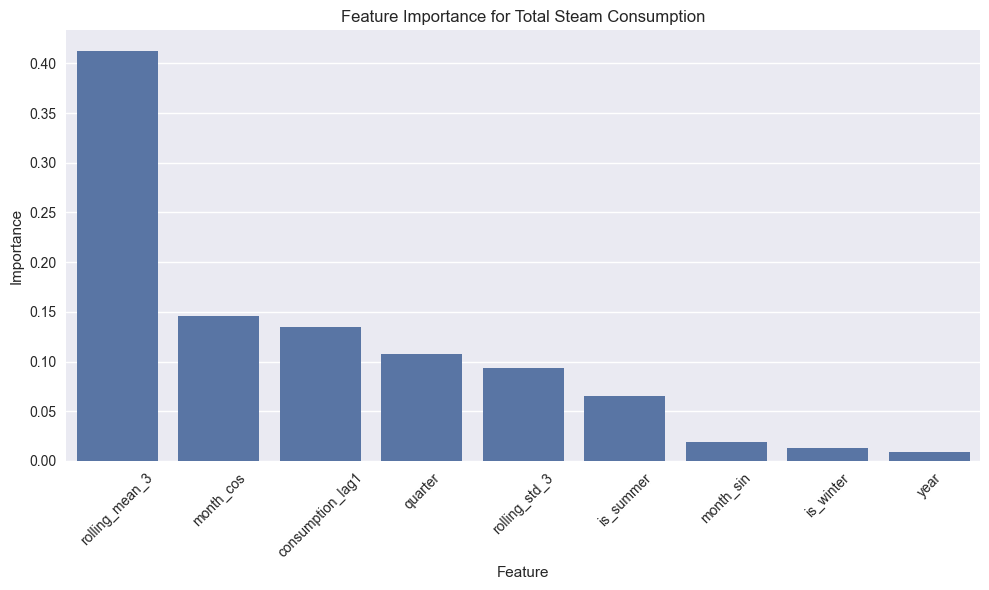

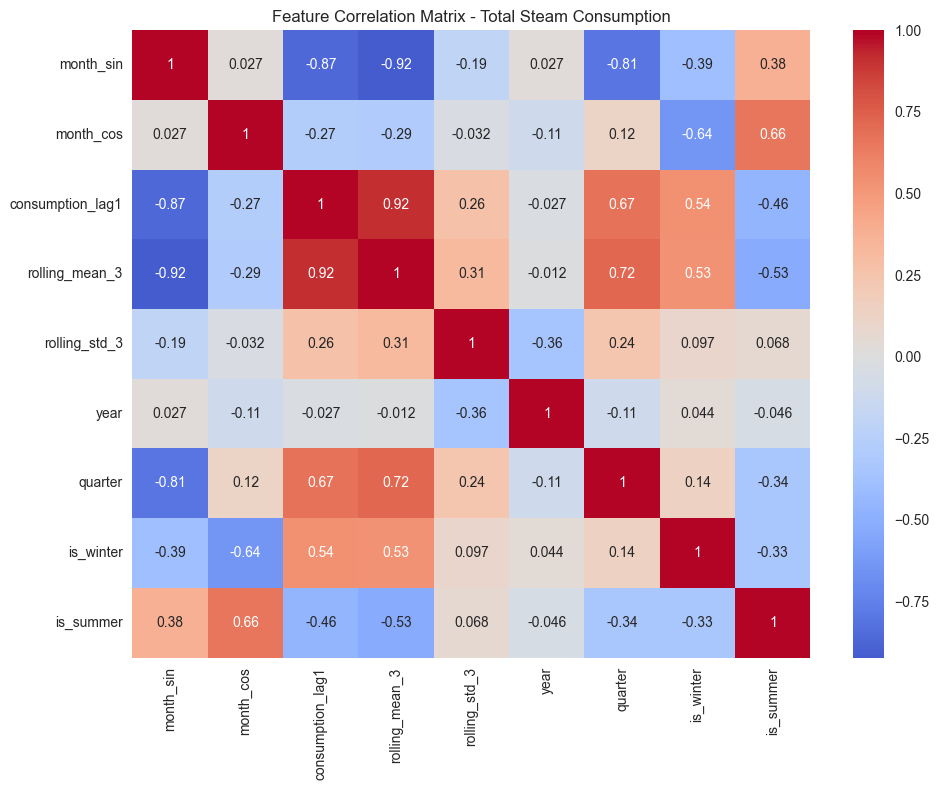


Feature Importance Rankings:
            Feature  Importance
3    rolling_mean_3    0.412454
1         month_cos    0.145471
2  consumption_lag1    0.134864
6           quarter    0.107684
4     rolling_std_3    0.093758
8         is_summer    0.065407
0         month_sin    0.019106
7         is_winter    0.012574
5              year    0.008682


In [133]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def create_time_features(df):
    # Create copy to avoid modifying original dataframe
    df = df.copy()
    
    # Calculate total consumption
    df['total_consumption'] = (df['castle_192_consumption_kwh'] + 
                             df['med_school_consumption_kwh'] + 
                             df['cumberland_d401_d404_consumption_kwh'])
    
    # Create datetime column
    df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + 
                               df['month'].map({
                                   'Jan': '01', 'Feb': '02', 'Mar': '03',
                                   'Apr': '04', 'May': '05', 'Jun': '06',
                                   'Jul': '07', 'Aug': '08', 'Sep': '09',
                                   'Oct': '10', 'Nov': '11', 'Dec': '12'
                               }) + '-01')
    
    # Extract month and year
    df['month_num'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    # Cyclical encoding of months
    df['month_sin'] = np.sin(2 * np.pi * df['month_num']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month_num']/12)
    
    # Lag and rolling features
    df['consumption_lag1'] = df['total_consumption'].shift(1).bfill()
    df['rolling_mean_3'] = df['total_consumption'].rolling(3, min_periods=1).mean()
    df['rolling_std_3'] = df['total_consumption'].rolling(3, min_periods=1).std()
    
    # Additional features
    df['quarter'] = ((df['month_num'] - 1) // 3 + 1).astype(int)
    df['is_winter'] = df['month_num'].isin([6, 7, 8]).astype(int)  # Southern hemisphere winter
    df['is_summer'] = df['month_num'].isin([12, 1, 2]).astype(int) # Southern hemisphere summer
    
    return df

def analyze_feature_importance(df):
    # Select features for modeling
    features = ['month_sin', 'month_cos', 'consumption_lag1', 
               'rolling_mean_3', 'rolling_std_3', 'year',
               'quarter', 'is_winter', 'is_summer']
    
    X = df[features]
    y = df['total_consumption']
    
    # Handle missing values
    X = X.fillna(0)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Get feature importance
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Feature', y='Importance')
    plt.title('Feature Importance for Total Steam Consumption')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return importance


# Create features
steam_features = create_time_features(steam_data)

# Analyze feature importance
feature_importance = analyze_feature_importance(steam_features)

# Check multicollinearity
features_to_check = ['month_sin', 'month_cos', 'consumption_lag1', 
                    'rolling_mean_3', 'rolling_std_3', 'year',
                    'quarter', 'is_winter', 'is_summer']

# Correlation matrix
correlation_matrix = steam_features[features_to_check].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix - Total Steam Consumption')
plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
print(feature_importance)



Evaluating Lasso

Results for Lasso (Combined Features):
Train R²: 0.8777 (+/- 0.0025)
Test R²: 0.7231 (+/- 0.1969)
Train RMSE: 89033.75
Test RMSE: 72160.25

Evaluating Ridge

Results for Ridge (Combined Features):
Train R²: 0.8776 (+/- 0.0025)
Test R²: 0.7220 (+/- 0.1982)
Train RMSE: 89065.64
Test RMSE: 72268.11

Evaluating LinearRegression

Results for LinearRegression (Combined Features):
Train R²: 0.8777 (+/- 0.0025)
Test R²: 0.7231 (+/- 0.1969)
Train RMSE: 89033.75
Test RMSE: 72159.80


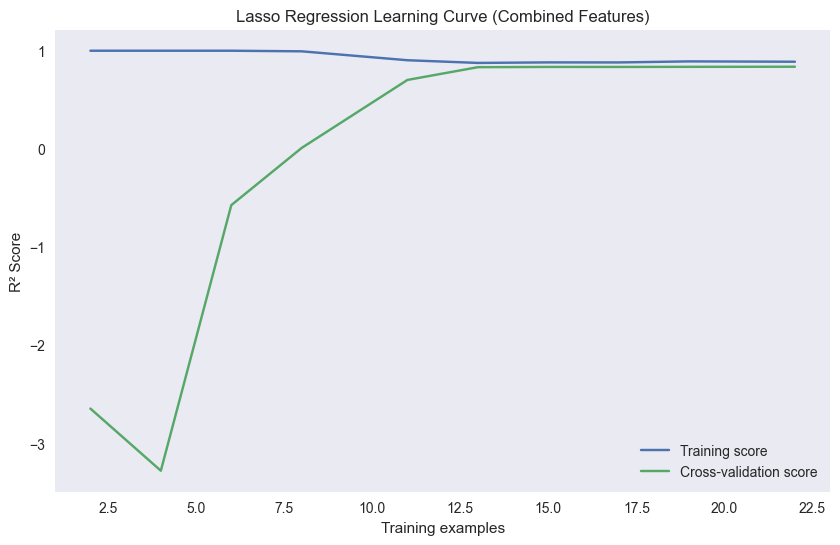

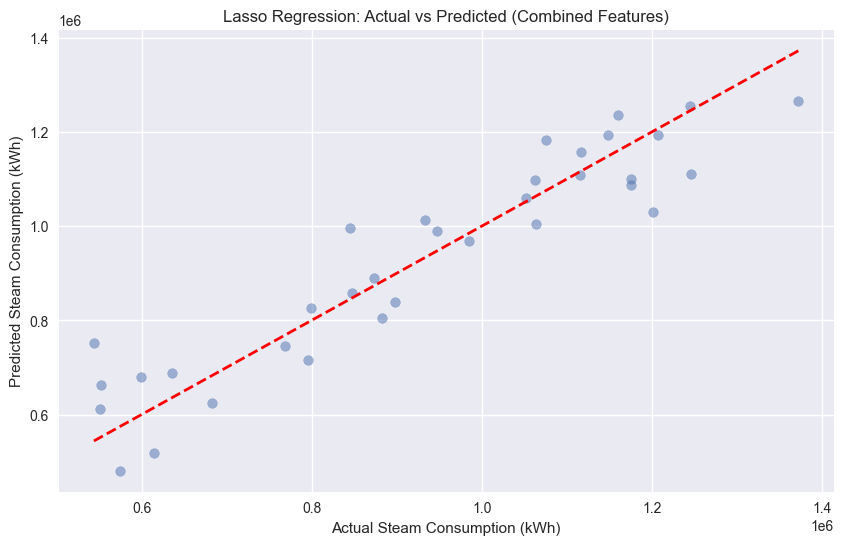

In [249]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data with aligned dates
def prepare_aligned_data(steam_data, weather_df):
    # Create date columns for both datasets
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Create date for steam data
    steam_data['date'] = pd.to_datetime(
        steam_data['year'].astype(str) + '-' + 
        steam_data['month'].map(month_map).astype(str) + '-01'
    )
    
    # Create date for weather data
    weather_df['date'] = pd.to_datetime(
        weather_df['Year'].astype(str) + '-' + 
        weather_df['Month'].astype(str) + '-01'
    )
    
    # Merge datasets on date
    merged_data = pd.merge(steam_data, weather_df, on='date', how='inner')
    
    return merged_data

def prepare_weather_features(df):
    """Prepare selected weather features based on correlation analysis"""
    features = pd.DataFrame({
        #'temp_mean': df['temp_mean'],
        #'morning_temp_mean': df['morning_temp_mean'],
        #'evening_temp_mean': df['evening_temp_mean'],
        #'weighted_monthly_score': df['weighted_monthly_score'],
        'term_days': df['term_days'],
        #'radiation_total': df['radiation_total']
    })
    return features

def prepare_temporal_features(df):
    """Prepare temporal features with focus on strong predictors"""
    df = df.copy()
    
    # Create month number mapping
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    df['month_num'] = df['month'].map(month_map)
    
    
    features = pd.DataFrame({
        'rolling_mean_3': df['total_consumption'].rolling(window=3, min_periods=1).mean(),
        'rolling_std_3': df['total_consumption'].rolling(window=3, min_periods=1).std(),
        'rolling_std_6': df['total_consumption'].rolling(window=6, min_periods=3).std(),
        'rolling_mean_6': df['total_consumption'].rolling(window=6, min_periods=3).mean(),
        #'rolling_mean_9': df['total_consumption'].rolling(window=9, min_periods=9).mean(),
        #'rolling_mean_12': df['total_consumption'].rolling(window=12, min_periods=1).mean(),
        #'consumption_lag1': df['total_consumption'].shift(1),
        #'consumption_lag3': df['total_consumption'].shift(3),
        #'consumption_lag12': df['total_consumption'].shift(12),
        #'month_cos': np.cos(2 * np.pi * df['month_num']/12),
        #'month_sin': np.sin(2 * np.pi * df['month_num']/12),
        #'year': df['year'] - 2022  # Normalize year
    })
    
    return features.fillna(features.mean())



def evaluate_model(model, X, y, model_name):
    """Evaluate model with modified cross-validation"""
    tscv = TimeSeriesSplit(n_splits=3, test_size=5)  # Reduced splits, adjusted test size
    scores = {
        'train_r2': [], 'test_r2': [], 
        'train_rmse': [], 'test_rmse': []
    }
    
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features for each fold
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    print(f"\nResults for {model_name}:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    return scores

def plot_learning_curve(model, X, y, title):
    """Plot learning curve for Lasso model"""
    X = np.nan_to_num(X, nan=np.nanmean(X))
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=3, scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

def plot_actual_vs_predicted(model, X, y, title):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Steam Consumption (kWh)')
    plt.ylabel('Predicted Steam Consumption (kWh)')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Main execution
steam_data = pd.read_csv(FILE_PATH)
weather_df = pd.read_csv(WEATHER_FILE_PATH)

# Calculate mean January value for Castle 192 from 2023 and 2024
jan_2023_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2023), 'castle_192_consumption_kwh'].values[0]
jan_2024_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2024), 'castle_192_consumption_kwh'].values[0]
jan_mean = (jan_2023_value + jan_2024_value) / 2  # (17800 + 3400) / 2 = 10600

# Update January 2022 value
steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2022), 'castle_192_consumption_kwh'] = jan_mean

# Calculate total consumption
steam_data['total_consumption'] = (
        steam_data['castle_192_consumption_kwh'] + 
        steam_data['med_school_consumption_kwh'] + 
        steam_data['cumberland_d401_d404_consumption_kwh']
)
# Update July 2022 anomaly
july_2023_total = steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
july_2024_total = steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
july_mean = (july_2023_total + july_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2022), 'total_consumption'] = july_mean

feb_2023_total = steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
feb_2024_total = steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
feb_mean = (feb_2023_total + feb_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2022), 'total_consumption'] = feb_mean

aug_2022_total = steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2022), 'total_consumption'].values[0]
aug_2024_total = steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
aug_mean = (aug_2022_total + aug_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2023), 'total_consumption'] = aug_mean

dec_2022_total = steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2022), 'total_consumption'].values[0]
dec_2023_total = steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
dec_mean = (dec_2022_total + dec_2023_total) / 2
steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2023), 'total_consumption'] = dec_mean


# Prepare aligned data
merged_data = prepare_aligned_data(steam_data, weather_df)

# Prepare features from aligned data
X_weather = prepare_weather_features(merged_data)
X_temporal = prepare_temporal_features(merged_data)
y = merged_data['total_consumption']

# Scale features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)
X_temporal_scaled = scaler.fit_transform(X_temporal)

# Combine weather and temporal features
X_combined = np.hstack([X_weather_scaled, X_temporal_scaled])

models = {
    'Lasso': Lasso(
        alpha=1,  # Increased alpha to reduce overfitting
        max_iter=2000
    ),
    'Ridge': Ridge(alpha=0.1),
    'LinearRegression':LinearRegression()
}

# Evaluate combined features
for name, model in models.items():
    print(f"\nEvaluating {name}")
    print("="*50)
    combined_scores = evaluate_model(model, X_combined, y, f"{name} (Combined Features)")

# Focus on Lasso Regression
lasso = Lasso(alpha=1)


# Plot learning curve for combined features
plot_learning_curve(lasso, X_combined, y, "Lasso Regression Learning Curve (Combined Features)")

lasso.fit(X_combined, y)
plot_actual_vs_predicted(lasso, X_combined, y, "Lasso Regression: Actual vs Predicted (Combined Features)")



Evaluating Voting

Results for Voting (Combined Features):
Train R²: 0.8686 (+/- 0.0036)
Test R²: 0.6420 (+/- 0.1789)
Train RMSE: 92290.00
Test RMSE: 87389.11

Evaluating Stacking

Results for Stacking (Combined Features):
Train R²: 0.8077 (+/- 0.0822)
Test R²: 0.6446 (+/- 0.2021)
Train RMSE: 110052.05
Test RMSE: 84273.24


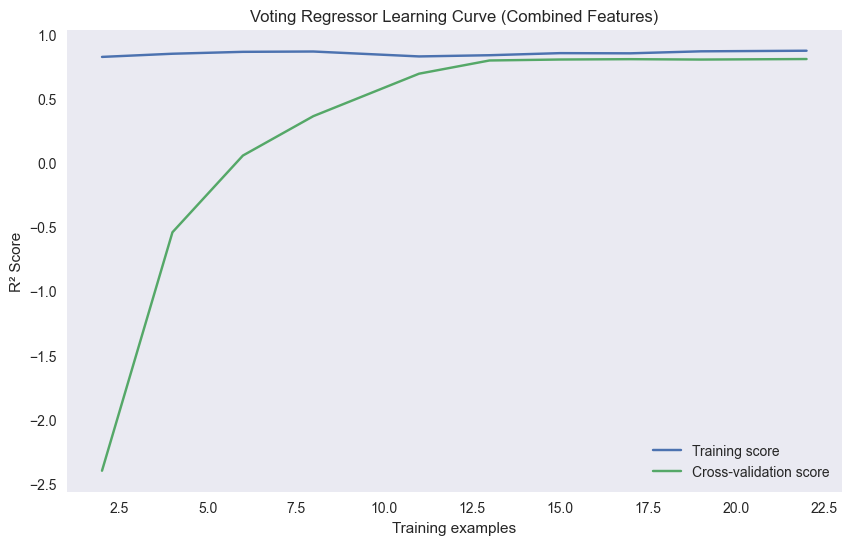

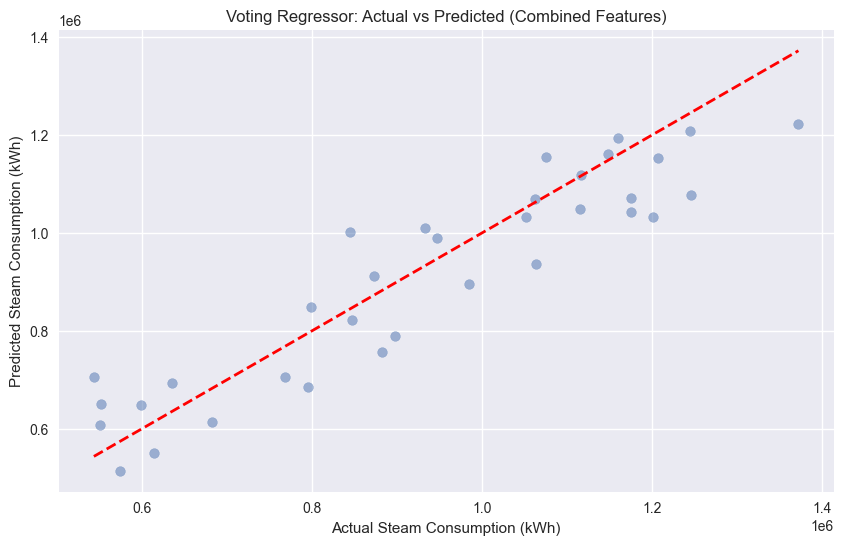

In [250]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define base models with optimized parameters
lasso = Lasso(alpha=1.0, max_iter=2000)
ridge = Ridge(alpha=0.5)
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=4,
    min_samples_leaf=4,
    random_state=42
)

# 1. Voting Regressor
voting_reg = VotingRegressor([
    ('lasso', lasso),
    ('ridge', ridge),
    ('rf', rf)
])

# 2. Stacking Regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('lasso', lasso),
        ('ridge', ridge),
        ('rf', rf)
    ],
    final_estimator=LinearRegression(),
    cv=3
)

# Evaluate models
models = {
    'Voting': voting_reg,
    'Stacking': stacking_reg
}

# Evaluate combined features
for name, model in models.items():
    print(f"\nEvaluating {name}")
    print("="*50)
    combined_scores = evaluate_model(model, X_combined, y, f"{name} (Combined Features)")

# Plot learning curves for best performing ensemble
plot_learning_curve(voting_reg, X_combined, y, "Voting Regressor Learning Curve (Combined Features)")
plot_actual_vs_predicted(voting_reg, X_combined, y, "Voting Regressor: Actual vs Predicted (Combined Features)")

In [251]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data with aligned dates
def prepare_aligned_data(steam_data, weather_df):
    # Create date columns for both datasets
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    # Create date for steam data
    steam_data['date'] = pd.to_datetime(
        steam_data['year'].astype(str) + '-' + 
        steam_data['month'].map(month_map).astype(str) + '-01'
    )
    
    # Create date for weather data
    weather_df['date'] = pd.to_datetime(
        weather_df['Year'].astype(str) + '-' + 
        weather_df['Month'].astype(str) + '-01'
    )
    
    # Merge datasets on date
    merged_data = pd.merge(steam_data, weather_df, on='date', how='inner')
    
    return merged_data

def prepare_weather_features(df):
    """Prepare selected weather features based on correlation analysis"""
    features = pd.DataFrame({
        'temp_mean': df['temp_mean'],
        'morning_temp_mean': df['morning_temp_mean'],
        'evening_temp_mean': df['evening_temp_mean'],
        #'weighted_monthly_score': df['weighted_monthly_score'],
        'term_days': df['term_days'],
        'radiation_total': df['radiation_total']
    })
    return features

def prepare_temporal_features(df):
    """Prepare temporal features with focus on strong predictors"""
    df = df.copy()
    
    # Create month number mapping
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    
    df['month_num'] = df['month'].map(month_map)
    
    
    features = pd.DataFrame({
        'rolling_mean_3': df['total_consumption'].rolling(window=3, min_periods=1).mean(),
        'rolling_std_3': df['total_consumption'].rolling(window=3, min_periods=1).std(),
        #'rolling_std_6': df['total_consumption'].rolling(window=6, min_periods=3).std(),
        #'rolling_mean_6': df['total_consumption'].rolling(window=6, min_periods=3).mean(),
        #'rolling_mean_9': df['total_consumption'].rolling(window=9, min_periods=9).mean(),
        #'rolling_mean_12': df['total_consumption'].rolling(window=12, min_periods=1).mean(),
        #'consumption_lag1': df['total_consumption'].shift(1),
        #'consumption_lag3': df['total_consumption'].shift(3),
        #'consumption_lag12': df['total_consumption'].shift(12),
        #'month_cos': np.cos(2 * np.pi * df['month_num']/12),
        #'month_sin': np.sin(2 * np.pi * df['month_num']/12),
        #'year': df['year'] - 2022  # Normalize year
    })
    
    return features.fillna(features.mean())



def evaluate_model(model, X, y, model_name):
    """Evaluate model with modified cross-validation"""
    tscv = TimeSeriesSplit(n_splits=3, test_size=5)  # Reduced splits, adjusted test size
    scores = {
        'train_r2': [], 'test_r2': [], 
        'train_rmse': [], 'test_rmse': []
    }
    
    X = np.nan_to_num(X, nan=np.nanmean(X))
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features for each fold
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    print(f"\nResults for {model_name}:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    return scores

def plot_learning_curve(model, X, y, title):
    """Plot learning curve for Lasso model"""
    X = np.nan_to_num(X, nan=np.nanmean(X))
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=3, scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

def plot_actual_vs_predicted(model, X, y, title):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Steam Consumption (kWh)')
    plt.ylabel('Predicted Steam Consumption (kWh)')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Main execution
steam_data = pd.read_csv(FILE_PATH)
weather_df = pd.read_csv(WEATHER_FILE_PATH)

# Calculate mean January value for Castle 192 from 2023 and 2024
jan_2023_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2023), 'castle_192_consumption_kwh'].values[0]
jan_2024_value = steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2024), 'castle_192_consumption_kwh'].values[0]
jan_mean = (jan_2023_value + jan_2024_value) / 2  # (17800 + 3400) / 2 = 10600

# Update January 2022 value
steam_data.loc[(steam_data['month'] == 'Jan') & (steam_data['year'] == 2022), 'castle_192_consumption_kwh'] = jan_mean

# Calculate total consumption
steam_data['total_consumption'] = (
        steam_data['castle_192_consumption_kwh'] + 
        steam_data['med_school_consumption_kwh'] + 
        steam_data['cumberland_d401_d404_consumption_kwh']
)
# Update July 2022 anomaly
july_2023_total = steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
july_2024_total = steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
july_mean = (july_2023_total + july_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Jul') & (steam_data['year'] == 2022), 'total_consumption'] = july_mean

feb_2023_total = steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
feb_2024_total = steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
feb_mean = (feb_2023_total + feb_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Feb') & (steam_data['year'] == 2022), 'total_consumption'] = feb_mean

aug_2022_total = steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2022), 'total_consumption'].values[0]
aug_2024_total = steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2024), 'total_consumption'].values[0]
aug_mean = (aug_2022_total + aug_2024_total) / 2
steam_data.loc[(steam_data['month'] == 'Aug') & (steam_data['year'] == 2023), 'total_consumption'] = aug_mean

dec_2022_total = steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2022), 'total_consumption'].values[0]
dec_2023_total = steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2023), 'total_consumption'].values[0]
dec_mean = (dec_2022_total + dec_2023_total) / 2
steam_data.loc[(steam_data['month'] == 'Dec') & (steam_data['year'] == 2023), 'total_consumption'] = dec_mean


# Prepare aligned data
merged_data = prepare_aligned_data(steam_data, weather_df)

# Prepare features from aligned data
X_weather = prepare_weather_features(merged_data)
X_temporal = prepare_temporal_features(merged_data)
y = merged_data['total_consumption']

# Scale features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)
X_temporal_scaled = scaler.fit_transform(X_temporal)

# Combine weather and temporal features
X_combined = np.hstack([X_weather_scaled, X_temporal_scaled])

models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=27,  # Reduced number of trees
        max_depth=3,      # Limited depth
        min_samples_leaf=5,
        random_state=42
    )
}

# Evaluate combined features
for name, model in models.items():
    print(f"\nEvaluating {name}")
    print("="*50)
    combined_scores = evaluate_model(model, X_combined, y, f"{name} (Combined Features)")




Evaluating Random Forest

Results for Random Forest (Combined Features):
Train R²: 0.8537 (+/- 0.0175)
Test R²: 0.6548 (+/- 0.2660)
Train RMSE: 97362.04
Test RMSE: 75934.40
